## Cleaning of countries dataset

In [1]:
from IPython.display import display_markdown

display_markdown(open("README.md").read(), raw=True)

# Countries data

This dataset contains administrative boundaries of countries.

- `Source`: Natural Earth
- `URL`

> [https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-0-countries/](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-0-countries/)

- `Processing`: transformations documented in `countries_cleaning.ipynb`
    - Clean file: `countries_clean.geojson`


In [1]:
%matplotlib inline

import geopandas

- Remove small islands

In [2]:
source_url = ("https://www.naturalearthdata.com/"\
              "http//www.naturalearthdata.com/download/"\
              "10m/cultural/ne_10m_admin_0_countries.zip"
             )
source_url

'https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip'

In [3]:
ctys = geopandas.read_file(source_url)

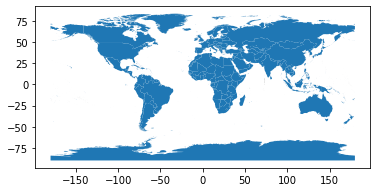

In [4]:
ctys.plot()

In [5]:
areas = ctys.to_crs(epsg=3857).area

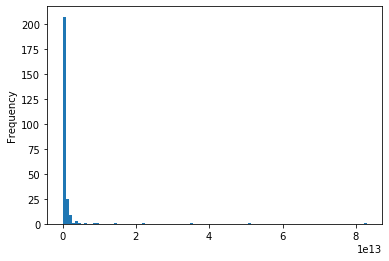

In [6]:
areas.plot.hist(bins=100)

In [7]:
smallest = areas.max() / 4000

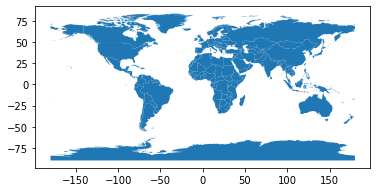

In [8]:
small = areas.loc[areas<smallest].index
large = ctys.loc[ctys.index.difference(small), :]
large.plot()

- Antartica

In [9]:
ys = large.centroid.geometry.y
large = large.loc[ys > ys.min(), :]

---

In [10]:
%time large = large.to_crs(epsg=3857)

CPU times: user 1.67 s, sys: 20.9 ms, total: 1.7 s
Wall time: 1.7 s


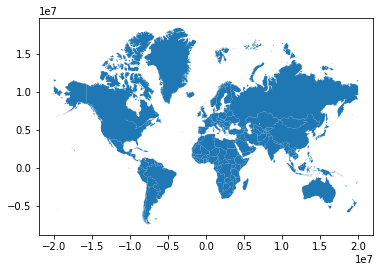

In [11]:
large.plot()

- Keep only relevant columns

In [12]:
large.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 160 entries, 0 to 239
Data columns (total 95 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   featurecla  160 non-null    object  
 1   scalerank   160 non-null    int64   
 2   LABELRANK   160 non-null    int64   
 3   SOVEREIGNT  160 non-null    object  
 4   SOV_A3      160 non-null    object  
 5   ADM0_DIF    160 non-null    int64   
 6   LEVEL       160 non-null    int64   
 7   TYPE        160 non-null    object  
 8   ADMIN       160 non-null    object  
 9   ADM0_A3     160 non-null    object  
 10  GEOU_DIF    160 non-null    int64   
 11  GEOUNIT     160 non-null    object  
 12  GU_A3       160 non-null    object  
 13  SU_DIF      160 non-null    int64   
 14  SUBUNIT     160 non-null    object  
 15  SU_A3       160 non-null    object  
 16  BRK_DIFF    160 non-null    int64   
 17  NAME        160 non-null    object  
 18  NAME_LONG   160 non-null    object  
 19  

In [13]:
tokeep = [
    "ADMIN",
    "geometry"
         ]

- Write out to file

In [14]:
large[tokeep].to_file('countries_clean.gpkg', 
                      driver="GPKG"
                     )

---

[[Download the `countries_clean.gpkg` file]](countries_clean.gpkg)